### Overview

This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

Content
This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time. See the glossary linked to below.

For further reference on individual fields see the Glossary of Terms. For the building classification codes see the Building Classifications Glossary.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In C:\Users\naufa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\naufa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\naufa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\naufa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\naufa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

In [3]:
data = pd.read_csv("nyc-rolling-sales.csv")
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

In [5]:
## Looping for know unique value each column
for col in data.columns:
    print("Column:",col)
    print(data[col].unique())

Column: Unnamed: 0
[    4     5     6 ... 26737 26738 26739]
Column: BOROUGH
[1 2 3 4 5]
Column: NEIGHBORHOOD
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'COUNTRY CLUB' 'CROTONA PARK' 'EAST RIVER' 'EAST TR

['6440' '18690' '7803' ... '977' '2683' '64117']
Column: YEAR BUILT
[1900 1913 1920 1910 2009 1925 1902 1928 1930 1935 1937 1915 1950 1929
 1901 1940 2005    0 1989 2014 2008 1965 2013 2003 2006 2007 1951 1899
 1850 1905 1864 1917 1911 1983 1926 1963 1960 1889 1898 1939 1938 1927
 1909 1958 1904 1907 1987 1931 1984 1948 2004 1918 1875 2012 1973 2011
 1922 2001 1932 1980 1908 1953 1906 2015 1946 1921 2010 1954 1111 1924
 1990 1890 1991 1988 1895 2016 1957 1986 1966 1998 1870 1923 1969 2017
 1968 1934 1956 1982 1914 1903 1967 1840 1912 1964 1955 1961 1851 2000
 1959 1962 1945 1972 1976 1916 1880 1970 1846 1941 1952 1896 1985 1981
 1888 1947 1975 1974 2002 1994 1892 1894 1891 1996 1997 1949 1999 1800
 1979 1971 1977 1942 1978 1826 1881 1919 1883 1936 1993 1995 1933 1992
 1943 1944 1847 1829 1844 1835 1852 1856 1854 1832 1845 1849 1855 1871
 1893 1865 1882 1680]
Column: TAX CLASS AT TIME OF SALE
[2 4 1 3]
Column: BUILDING CLASS AT TIME OF SALE
['C2' 'C7' 'C4' 'D5' 'D9' 'D7' 'D1' 'C6' 'D0' 

### Preprocessing

In [6]:
int_columns = ["BOROUGH", "BLOCK", "LOT", "ZIP CODE", 
              "RESIDENTIAL UNITS", "COMMERCIAL UNITS", 
              "TOTAL UNITS", "YEAR BUILT"]

In [ ]:
cnt=0
for i in int_columns:
    for row in data[i]:
        try:
            int(row)
            data.loc[cnt, i]=np.nan
        except ValueError:
            pass
        cnt+=1

In [122]:
for row in data["SALE PRICE"]:
        try:
            int(row)
            data.loc[cnt, "SALE PRICE"]=np.nan
        except ValueError:
            pass
        cnt+=1

KeyboardInterrupt: 

### Measure of Central Tendency: Mean

In [7]:
for i in int_columns:
    print("Mean",i, "=", data[i].mean())

Mean BOROUGH = 2.9987581019066094
Mean BLOCK = 4237.218976202867
Mean LOT = 376.22401476084593
Mean ZIP CODE = 10731.99161423097
Mean RESIDENTIAL UNITS = 2.0252637554998345
Mean COMMERCIAL UNITS = 0.19355868855561337
Mean TOTAL UNITS = 2.249183895538629
Mean YEAR BUILT = 1789.322976297488


### Measure of Central Tendency: Median

In [8]:
for i in int_columns:
    print("Median",i, "=", data[i].median())

Median BOROUGH = 3.0
Median BLOCK = 3311.0
Median LOT = 50.0
Median ZIP CODE = 11209.0
Median RESIDENTIAL UNITS = 1.0
Median COMMERCIAL UNITS = 0.0
Median TOTAL UNITS = 1.0
Median YEAR BUILT = 1940.0


### Measure of Central Tendency: Modus

In [9]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [10]:
for i in int_columns:
    print("Modus",i, "=", statistics.mode(data[i]))

Modus BOROUGH = 4
Modus BLOCK = 5066
Modus LOT = 1
Modus ZIP CODE = 10314
Modus RESIDENTIAL UNITS = 1
Modus COMMERCIAL UNITS = 0
Modus TOTAL UNITS = 1
Modus YEAR BUILT = 0


### Measure of Spread: Range

In [11]:
for i in int_columns:
    print("Range",i, "=", np.ptp(data[i]))

Range BOROUGH = 4
Range BLOCK = 16321
Range LOT = 9105
Range ZIP CODE = 11694
Range RESIDENTIAL UNITS = 1844
Range COMMERCIAL UNITS = 2261
Range TOTAL UNITS = 2261
Range YEAR BUILT = 2017


C:\Users\naufa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Measure of Spread: Variance

In [12]:
for i in int_columns:
    n = len(data[i])

    mean_ = sum(data[i]) / n

    var_ = sum((item - mean_)**2 for item in data[i]) / (n - 1)
    print("Variance ",i," = ", var_)

Variance  BOROUGH  =  1.6635583710924047
Variance  BLOCK  =  12732503.739102311
Variance  LOT  =  433144.0659415073
Variance  ZIP CODE  =  1666368.972536637
Variance  RESIDENTIAL UNITS  =  279.59307883929864
Variance  COMMERCIAL UNITS  =  75.91956440873304
Variance  TOTAL UNITS  =  359.95896003024995
Variance  YEAR BUILT  =  288739.64196812856


### Measure of Spread: Standard Deviation

In [14]:
for i in int_columns:
    n = len(data[i])

    mean_ = sum(data[i]) / n

    var_ = sum((item - mean_)**2 for item in data[i]) / (n - 1)
    print("Standar Deviation ",i," = ", var_**0.5)

Standar Deviation  BOROUGH  =  1.2897900492298755
Standar Deviation  BLOCK  =  3568.263406631062
Standar Deviation  LOT  =  658.136813999572
Standar Deviation  ZIP CODE  =  1290.879147146098
Standar Deviation  RESIDENTIAL UNITS  =  16.72103701447068
Standar Deviation  COMMERCIAL UNITS  =  8.713183368249117
Standar Deviation  TOTAL UNITS  =  18.972584432023222
Standar Deviation  YEAR BUILT  =  537.3449934335748


### Probability distribution

In [15]:
from scipy.stats import binom
data_binom = data["BOROUGH"]

[Text(0.5, 0, 'Binomial Distribution'), Text(0, 0.5, 'Frequency')]

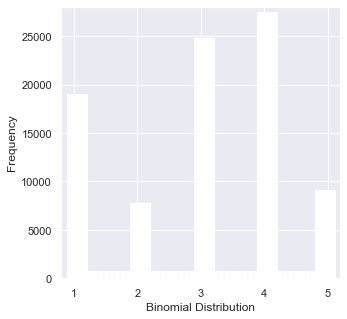

In [16]:
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

[Text(0.5, 0, 'Exponential Distribution'), Text(0, 0.5, 'Frequency')]

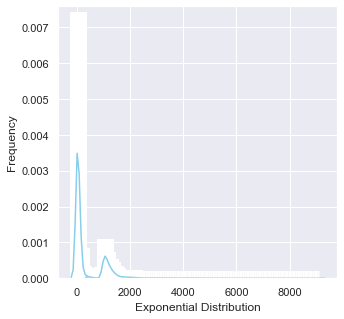

In [17]:
data_expon = data["LOT"]
ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

### Confidence Intervals

In [18]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

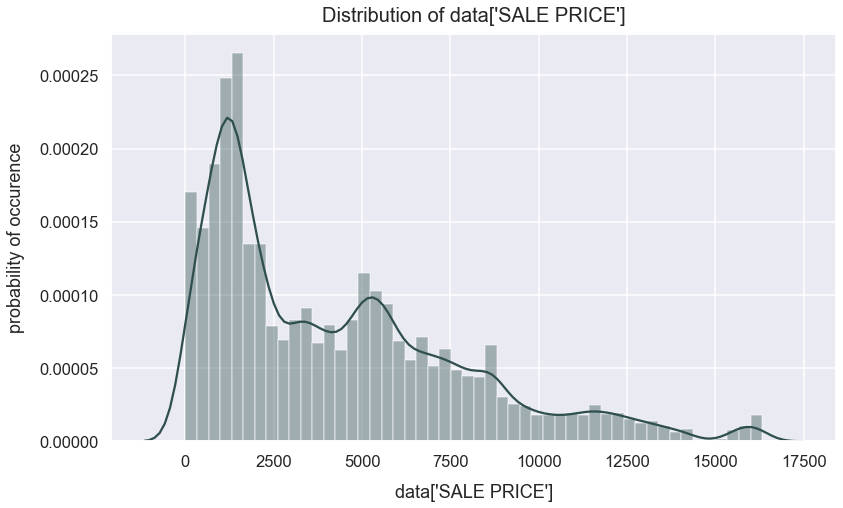

In [19]:
sns.distplot(data['BLOCK'], color="darkslategrey")
plt.xlabel("data['SALE PRICE']", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of data['SALE PRICE']", y=1.015, fontsize=20);

In [20]:
# Calculation Population Mean
pop_mean_mass = data['BLOCK'].mean()
pop_mean_mass

4237.218976202867

In [21]:
# Calculate Population Standard Deviation
pop_std_dev_mass = data['BLOCK'].std()
pop_std_dev_mass

3568.263406631062

In [22]:
sample_means = []
n = 25
for sample in range(0, 300):
    # random sampling done with replacement
    sample_values = np.random.choice(a=data['BOROUGH'], size=n)    
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

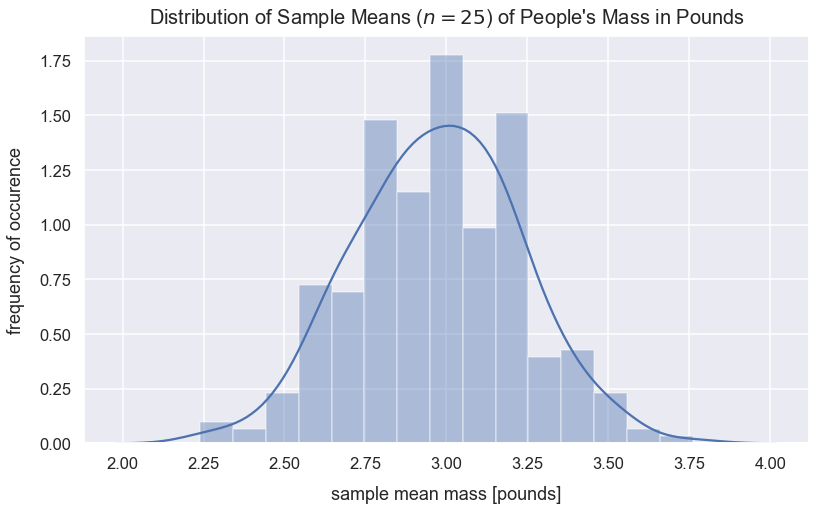

In [23]:
# View Distribution of Sample Means (Otherwise Called Sampling Distribution)
sns.distplot(sample_means)
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

In [24]:
# Calculate Median of Sample Means
median_of_sample_means = np.median(sample_means)
median_of_sample_means

2.98

In [25]:
# Calculate Mean of Sample Means
mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

2.9726666666666666

In [26]:
pop_mean_mass

4237.218976202867

In [27]:
# Calculate Standard Deviation of Sample Means
std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

0.2537916906090943

In [28]:
standard_error = pop_std_dev_mass/np.sqrt(n)
standard_error

713.6526813262124

In [29]:
std_dev_of_sample_means

0.2537916906090943

In [30]:
tail = 1 - stats.norm.cdf(1.96)
tail

0.024997895148220484

In [31]:
# The area under the curve between the z-critcal scores is approximately 0.95
1 - (tail * 2)

0.950004209703559

In [32]:
lower_95_perc_bound = mean_of_sample_means - 1.96*standard_error
lower_95_perc_bound

-1395.7865887327096

In [33]:
upper_95_perc_bound = mean_of_sample_means + 1.96*standard_error
upper_95_perc_bound

1401.7319220660427

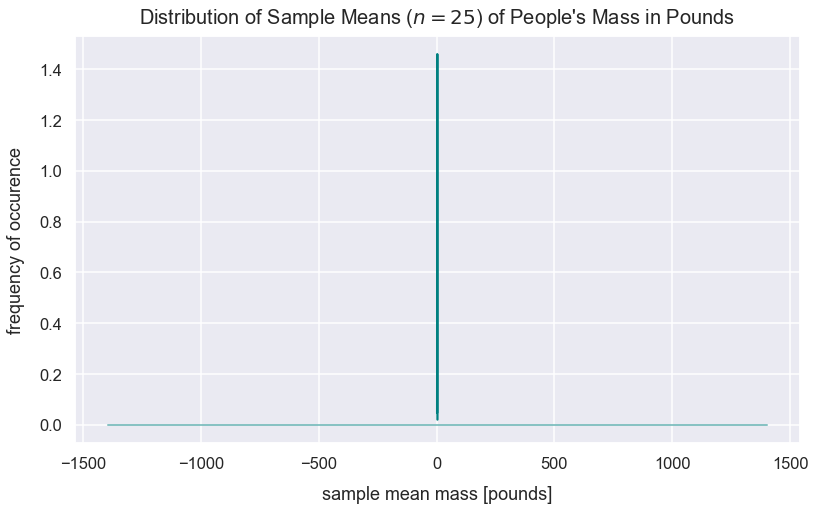

In [34]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(lower_95_perc_bound, upper_95_perc_bound, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal',)
#plt.text(x=154, y=.01, horizontalalignment='center', fontsize=17, 
        # s="95% of sample means fall within\nthis shaded area of plus or minus\n1.96 z-scores from the mean", 
        # bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.1"))
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

### Hypothesis Testing

In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats.distributions as dist

In [36]:
p_us = len(data[data['BOROUGH']==1])/len(data['BOROUGH'])

In [37]:
p_us

0.21651606188200787

In [38]:
se = np.sqrt(0.42 * (1-0.42) / len(data['BOROUGH']))

In [39]:
se

0.0016974108449831788

In [40]:
#Best estimate
be = p_us

#hypothesized estimate
he = 0.42
test_stat = (be - he)/se

In [41]:
test_stat, be

(-119.87901380470362, 0.21651606188200787)

In [42]:
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))

In [43]:
pvalue

0.0